In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
cv2.__version__

'4.5.3'

In [3]:
cap = cv2.VideoCapture(os.path.join('data','sparse_optical_flow.avi'))

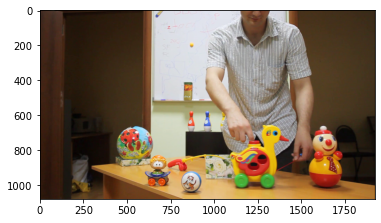

In [4]:
ret, frame1 = cap.read()
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))

In [5]:
print(width, height, length, fps)

1920 1080 165 20.0


In [6]:
 # params for ShiTomasi corner detection
 feature_params = dict( maxCorners = 100,
                        qualityLevel = 0.3,
                        minDistance = 7,
                        blockSize = 7 )

In [7]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


In [8]:
# Create some random colors
color = np.random.randint(0,255,(100,3))

In [9]:
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

In [10]:
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

In [11]:
# Create output video
video = cv2.VideoWriter('lk_video.avi',cv2.VideoWriter_fourcc('X','V','I','D'),fps,(width,height))

In [12]:
j=1
while(j<length-2):
   print(j)
   ret,frame = cap.read()

   frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
   # calculate optical flow
   p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
 
   # Select good points
   if p1 is not None:
       good_new = p1[st==1]
       good_old = p0[st==1]
  
   # draw the tracks
   for i, (new, old) in enumerate(zip(good_new, good_old)):
       a, b = new.ravel()
       c, d = old.ravel()
       mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
       frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        
   img = cv2.add(frame,mask)
   video.write(img)

   # Now update the previous frame and previous points
   old_gray = frame_gray.copy()
   p0 = good_new.reshape(-1,1,2)
   
   j = j + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


In [13]:
video.release()

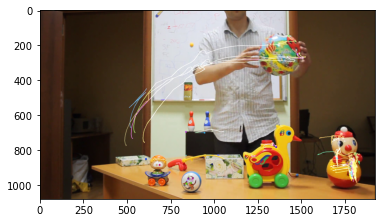

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
from IPython.display import FileLink, FileLinks
#FileLink('./lk_video.avi')